<a href="https://colab.research.google.com/github/TriNguyen2002/RL-Journal/blob/main/Blackjack-Monte-Carlo-Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Requirements:
- gymnassium
- numpy

In [1]:
!pip install "gymnasium>=1.0.0"
!pip install numpy


**We will use First visit Monte Carlo Estimation (Value functions are updated once the state is visited)**

Algorithm:
- Init the policy to be evaluated
- Init the value function randomly
- init a list of return for all states
- repeat for 50.000 episode:
  - generate episode using policy
  - for each state s:
    - calculate the return G when first visit s
    - append G to the list of returns
    - calculate the average of returns for s

Notes:
- Ace could be 1 or 10 => boolean for usable ace
- dealer show 1 card
- target is 21
==> state space is [player sum, dealer card, ace bool]
- reward: +1 for win, -1 for loss, 0 for draw
- policy: hit if total < 20, else stick

In [36]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt


Create agent class:

In [37]:
class Agent():
    def __init__(self, gamma = 0.99):
        self.V = {}
        self.sum_space = [i for i in range(4,22)]
        self.dealer_show_card_space = [i+1 for i in range(10)]
        self.ace_space = [False, True]
        self.action_space = [0,1]   # stick or hit

        self.state_space = [] # [player's total, dealer card, ace bool]
        self.returns = {}
        self.states_visited = {} # first visit or not
        self.memory = [] #[state, reward] or episode data
        self.gamma = gamma

        self.init_vals()

    def init_vals(self):
        for total in self.sum_space:
            for card in self.dealer_show_card_space:
                for ace in self.ace_space:
                    self.V[(total,card,ace)] = 0
                    self.returns[(total,card,ace)] = []
                    self.states_visited[(total,card,ace)] = 0
                    self.state_space.append((total,card,ace))

    def policy(self,state):
        total,_,_ = state
        action = 0 if total >=20 else 1
        return action

    def update_V(self):
        ''' The reward formula for a state follows:
            G = (R*gamma^discount)
        '''
        for idt,(state,_) in enumerate(self.memory):
            G = 0
            if self.states_visited[state] == 0:
                self.states_visited[state] +=1
                discount = 1
                for t,(_,reward) in enumerate(self.memory[idt:]):
                    G += reward*discount
                    discount *= self.gamma
                    self.returns[state].append(G)

        '''Calculate the estimate value of a state (average of G)'''
        for state, _ in self.memory:
            self.V[state] = np.mean(self.returns[state])

        '''Reset environment for the next episode'''
        for state in self.state_space:
            self.states_visited[state] = 0
        self.memory = []

Train and evaluate

episodes:  0
episodes:  50000
episodes:  100000
episodes:  150000
episodes:  200000
episodes:  250000
episodes:  300000
episodes:  350000
episodes:  400000
episodes:  450000


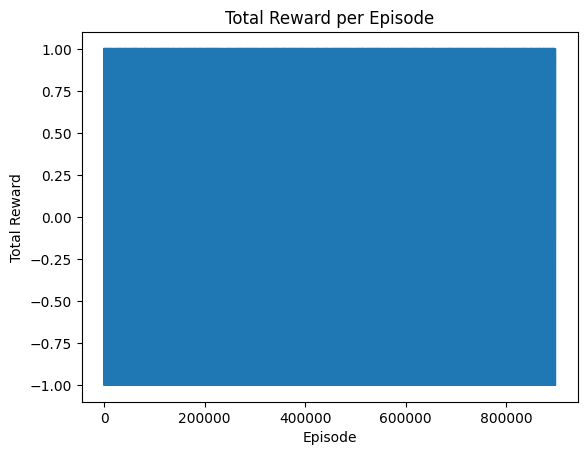

In [38]:
env = gym.make("Blackjack-v1")
agent = Agent()
n_eps = 500000
episode_rewards = []
for i in range(n_eps):
    obs,_ = env.reset()
    done = False
    episode_reward = 0
    while not done:
        act = agent.policy(obs)
        obs_, reward, done, _, info = env.step(act)
        agent.memory.append([obs, reward]) # take the observation of the previous state
        obs = obs_
        episode_reward += reward
        episode_rewards.append(episode_reward)
    if i % 50000 ==0:
      print("episodes: ", i)
    agent.update_V()




Checking the value of a state

In [35]:
print(agent.V[(16,3,True)])

-0.12052230264848662


Plotting the rewards over time, value of important states - high chance of winning

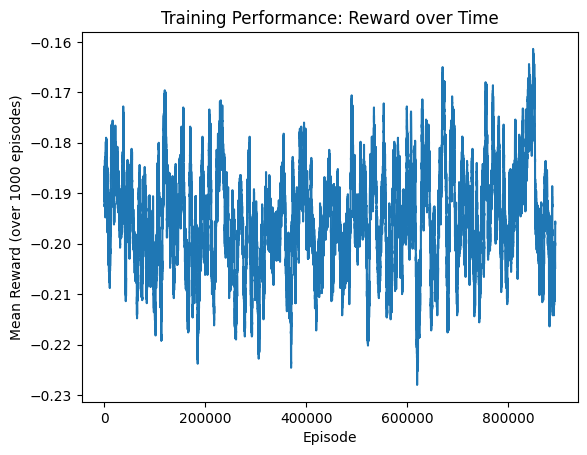

In [40]:
window = 5000
mean_rewards = [np.mean(episode_rewards[i:i+window]) for i in range(0, len(episode_rewards) - window)]

plt.plot(mean_rewards)
plt.xlabel('Episode')
plt.ylabel('Mean Reward (over 1000 episodes)')
plt.title('Training Performance: Reward over Time')
plt.show()